# Lab 2

Completed by: Peter Peng, Hyechan Jun, Nathan Wang, Won-Seok Park (Auditing)

In [1]:
from fastai.vision.all import *

# Make one-channel images display in greyscale.
# See https://forums.fast.ai/t/show-image-displays-color-image-for-mnist-sample-dataset/78932/4
matplotlib.rc('image', cmap='Greys')

## Exercise 1

In [2]:
path = untar_data(URLs.PETS)/'images'

In [3]:
# Cat images have filenames that start with a capital letter.
def is_cat(filename):
    return filename[0].isupper()

image_files = get_image_files(path).sorted()

# Construct the data loader
set_seed(12345, reproducible=True)
dataloaders = ImageDataLoaders.from_name_func(
    bs=8, 
    path=path,
    fnames=image_files,
    # Use a 20% validation split, with a seed of 42 for reproducibiliy
    valid_pct=0.2,
    seed=42,
    # label files using their name
    label_func=is_cat,
    # Resize all images to 224x224 pixels
    item_tfms=Resize(224),
)

In [4]:
learn = cnn_learner(
    dls=dataloaders,
    arch=resnet34,
    metrics=error_rate
)
learn.fine_tune(epochs=1)

epoch,train_loss,valid_loss,error_rate,time
0,0.220826,0.065281,0.020298,01:41


epoch,train_loss,valid_loss,error_rate,time
0,0.088009,0.019216,0.005413,02:36


In [5]:
dataloaders.train.bs

8

In [6]:
clf_1_error_rates = [0.008796]

In [7]:
learn2 = cnn_learner(
    dls=dataloaders,
    arch=resnet18,
    metrics=error_rate
)
learn2.fine_tune(epochs=1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /tmp/.unburden-nw37/cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.238877,0.055833,0.018268,01:00


epoch,train_loss,valid_loss,error_rate,time
0,0.093189,0.019940,0.008119,01:30


In [8]:
clf_2_error_rates = [0.008119]

The error rate is lower by ~0.0006, which is better but not substantially. However, there is a significant improvement in the fine-tuning time, making the second model more appealing.

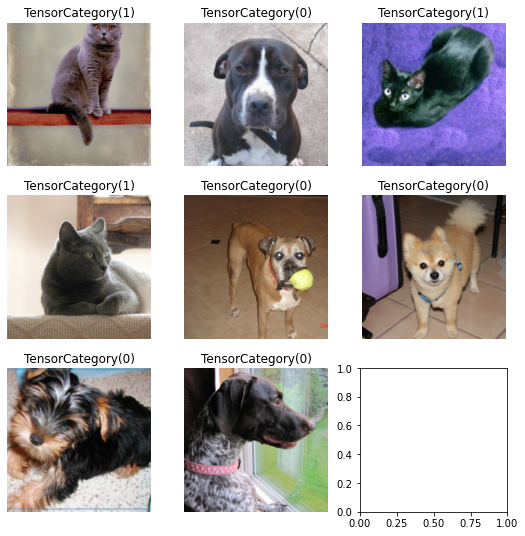

In [11]:
batch_transformed = dataloaders.train.one_batch()
batch = dataloaders.train.decode(batch_transformed)
images_orig, labels = batch
images = images_orig.clone()

show_image_batch((images, labels))

In [12]:
images.shape

torch.Size([8, 3, 224, 224])

<AxesSubplot:>

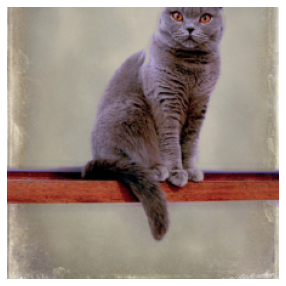

In [15]:
show_image(images[0])

The first value is the batch size, the second value is the colour channel